<a href="https://colab.research.google.com/github/Shiveringapple/MechineLearing/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from urllib.request import urlretrieve
url = "https://github.com/Elwing-Chou/ml0804/raw/master/train.csv"
urlretrieve(url, "train.csv")
train_df = pd.read_csv("train.csv", encoding="utf-8")
url = "https://github.com/Elwing-Chou/ml0804/raw/master/test.csv"
urlretrieve(url, "test.csv")

('test.csv', <http.client.HTTPMessage at 0x7f06c4a2ffd0>)

In [ ]:
train_df = pd.read_csv("train.csv", encoding="utf-8")
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
test_df = pd.read_csv("test.csv", encoding="utf-8")
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
# concat: axis!!!
datas = pd.concat([train_df, test_df]).reset_index(drop=True)
datas = datas.drop(["PassengerId", "Survived"], axis=1)
datas

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
# 篩選操作 df[[True, False, True]]
s = datas.isna().sum()
s[s > 0].sort_values(ascending=False)

Cabin       1014
Age          263
Embarked       2
Fare           1
dtype: int64

## **Step** 1 : 補缺失值

In [ ]:
# 填缺失值：類別 -> 最常出現的字 -> most
most = datas["Embarked"].value_counts().idxmax()
datas["Embarked"] = datas["Embarked"].fillna(most)

In [ ]:
# 填缺失值：有大小關係填中位數 -> median
med = datas.median().drop(["Pclass"])
datas = datas.fillna(med)

In [ ]:
# apply: 
def cabin(s):
  if not pd.isna(s):
    return s[0]
  else:
    return None
datas["Cabin"] = datas["Cabin"].apply(cabin)

In [ ]:
# 多少人持有同樣名字的票
v = datas["Ticket"].value_counts()
def ticket(s):
  global v
  return v[s]
datas["Ticket"] = datas["Ticket"].apply(ticket)

In [ ]:
def name(s):
  return s.split(".")[0].split(",")[-1].strip()
n = datas["Name"].apply(name).value_counts()
whitelist = n[:4]

In [ ]:
def name2(s):
  mid = s.split(".")[0].split(",")[-1].strip()
  if mid in whitelist:
    return mid
  else:
    return None
datas["Name"] = datas["Name"].apply(name2)
datas

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,Mr,male,22.0,1,0,1,7.2500,None,S
1,1,Mrs,female,38.0,1,0,2,71.2833,C,C
2,3,Miss,female,26.0,0,0,1,7.9250,None,S
3,1,Mrs,female,35.0,1,0,2,53.1000,C,S
4,3,Mr,male,35.0,0,0,1,8.0500,None,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,Mr,male,28.0,0,0,1,8.0500,None,S
1305,1,None,female,39.0,0,0,3,108.9000,C,C
1306,3,Mr,male,38.5,0,0,1,7.2500,None,S
1307,3,Mr,male,28.0,0,0,1,8.0500,None,S


## **Step** 2 : 類別做One-Hot Encoding

In [ ]:
# 指定的話 columns=["Pclass"]
datas = pd.get_dummies(datas)
datas = pd.get_dummies(datas, columns=["Pclass"])
datas

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,22.0,1,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,26.0,0,0,1,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,35.0,1,0,2,53.1000,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
4,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1305,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
1306,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1307,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [ ]:
datas["Family"] = datas["SibSp"] + datas["Parch"]
datas

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family
0,22.0,1,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1
2,26.0,0,0,1,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,35.0,1,0,2,53.1000,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1
4,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1305,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1306,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1307,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [ ]:
# .iloc: [第一列, 第二列, 第三列...]
x_train = datas.iloc[:len(train_df)]
x_predict = datas.iloc[len(train_df):]
y_train = train_df["Survived"]
# !!!
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
datas_scale = pd.DataFrame(scaler.fit_transform(datas), columns=datas.columns)
x_train_scale = datas_scale.iloc[:len(train_df)]
x_predict_scale = datas_scale.iloc[len(train_df):]

## **Step** 3 : 選演算法
##   組合： 
####      平行(Bugging) : 同時訓練很多分類器，但需要隨機性的不同觀點，隨機丟掉不同資料，讓每個分類器看到不同資料，以達到交叉驗證的目的，Ex : RandomForestClassifier 
####     序列(Boosting) : 一步一步訓練分類器最後統計所有，Ex : AdaBoost, XGBoost...

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier(random_state=0)
params = {
    "n_estimators":range(38, 40),
    "max_depth":range(5, 7)
}
grid = GridSearchCV(clf, params, cv=10, n_jobs=-1)
grid.fit(x_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 5, 'n_estimators': 38}
0.8327840199750313


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
clf = RandomForestClassifier(n_estimators=37, max_depth=6)
scores = cross_val_score(clf, x_train, y_train, cv=10, n_jobs=-1)
print("[10]:", scores)
print("average:", np.average(scores))

[10]: [0.81111111 0.86516854 0.75280899 0.87640449 0.86516854 0.82022472
 0.83146067 0.79775281 0.86516854 0.84269663]
average: 0.832796504369538


In [ ]:
clf = RandomForestClassifier(n_estimators=37, max_depth=6)
clf.fit(x_train, y_train)
pre = clf.predict(x_predict)
ans = pd.DataFrame({
    "PassengerId":test_df["PassengerId"],
    "Survived":pre
})
ans.to_csv("rf.csv", encoding="utf-8", index=False)
ans

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
pd.DataFrame({
    "columns":datas.columns,
    "Importance":clf.feature_importances_
})

,columns,Importance
0,Age,0.067826
1,SibSp,0.029409
2,Parch,0.014180
3,Ticket,0.047756
4,Fare,0.093543
5,Name_Master,0.019994
6,Name_Miss,0.033477
7,Name_Mr,0.116907
8,Name_Mrs,0.061933
9,Sex_female,0.173806


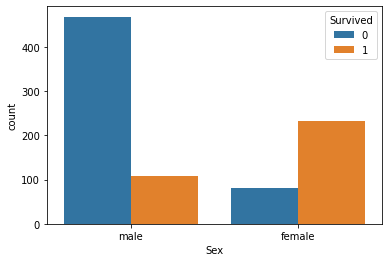

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# sns.countplot(x=train_df["Pcalss"], hue=train_df["Survived"])
sns.countplot(x=train_df["Sex"], hue=train_df["Survived"])

# KNN ： K-Nearest Neighbors
##距離型演算法
###單位最重要 -> Scaling ex: MinMax
啟動的資料需要較少 10筆左右就可以跑了
####處理時間較短

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
params = {
    "n_neighbors":range(5, 100),
}
grid = GridSearchCV(clf, params, cv=10, n_jobs=-1)
grid.fit(x_train_scale, y_train)
print(grid.best_params_)
print(grid.best_score_)

{'n_neighbors': 7}
0.832796504369538


In [ ]:
# 11: 我刻意調整的
clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(x_train_scale, y_train)
pre = clf.predict(x_predict_scale)
ans = pd.DataFrame({
    "PassengerId":test_df["PassengerId"],
    "Survived":pre
})
ans.to_csv("knn2.csv", encoding="utf-8", index=False)
ans

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


#RandomForest的優點：
  ## feature_importances -> 有重要性的排序(決策樹) 
  ## -> 哪些欄位比較重要 -> UX較好